# STA221 Final Project: Comparisons of Different Classification Methods

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from scipy.io import arff
import pyreadr
from time import process_time 

## Eight Data Sets with Different Dimension Features and Preprocessing

In [7]:
# standardization function
def scaler(X_train, X_test):
    Scaler = StandardScaler()
    Scaler.fit(X_train)
    X_tr = Scaler.transform(X_train)
    X_te = Scaler.transform(X_test)
    return X_tr, X_te

__1.Skin Segmentation__

In [3]:
skin = pd.read_csv('Skin_NonSkin.txt', header = None, delim_whitespace=True)
skin = skin.dropna()
skin.columns = "B", "G", "R", "class"
skin['class'] = skin['class'].replace(2,-1)
X1 = skin[skin.columns[range(3)]].values
y1 = skin["class"].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
X1_train, X1_test = scaler(X1_train, X1_test)

In [4]:
X1_test

array([[ 1.18470043,  1.07426412,  0.53470259],
       [-0.72595762, -0.32641826,  0.81030778],
       [ 1.36131588,  1.2743616 ,  1.23749584],
       ...,
       [ 1.05625283,  0.95754059,  0.31421843],
       [-1.38425157, -1.07678382, -1.07758782],
       [ 1.60215513,  1.29103639, -0.54015768]])

__2.Pulstar__

In [5]:
pulstar = pd.read_csv('HTRU2/HTRU_2.csv', header = None)
pulstar = pulstar.dropna()
pulstar.columns = "mean_profile", "sd_profile", "kurtosis", "skewness", "mean_DMSNR", "sd_DMSNR", "kurtosisDMSNR", "skewnessDMSNR", "class"
X2 = pulstar[pulstar.columns[range(8)]].values
y2 = pulstar["class"].values
y2 = y2 * 2 -1 

In [6]:
##Balance the data with SMOTE
smote = SMOTE(random_state = 100)
X2, y2 = smote.fit_sample(X2, y2)
pd.Series(y2).value_counts()

-1    16259
 1    16259
dtype: int64

In [7]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=100)
X2_train, X2_test = scaler(X2_train, X2_test)

In [8]:
X2_test

array([[-1.55023375, -1.33382251,  1.65454085, ...,  0.94199837,
        -0.90507225, -0.67301051],
       [ 1.08816873,  0.26742087, -0.76576687, ..., -0.92422026,
         0.51855503,  0.19007404],
       [ 1.2032318 ,  0.02556128, -0.77890961, ..., -0.8594964 ,
         0.75504137,  0.30858986],
       ...,
       [-1.15111847, -1.06326387,  1.13574793, ...,  0.90027756,
        -0.82986981, -0.65919392],
       [ 0.61579896,  0.76154159, -0.66997891, ..., -1.12660318,
         1.48470116,  1.56306863],
       [ 0.28252465,  0.15418121, -0.50264056, ..., -0.90681788,
         0.48520797,  0.13430422]])

__3.Tumor__

In [9]:
a3 = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
b3 = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [10]:
combine = pd.concat([a3, b3], axis=1)
tumor = combine.drop(combine.columns[0], axis=1)

In [11]:
pd.Series(tumor["Class"]).value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [12]:
tumor2 = tumor[(tumor["Class"] == "KIRC") | (tumor["Class"] == "LUAD")]
tumor2 = tumor2.dropna()
X3 = tumor2[tumor2.columns[range(20531)]].values
y3 = np.array([1 if item == 'LUAD' else -1 for item in tumor2["Class"].values])

In [13]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=100)
X3_train, X3_test = scaler(X3_train, X3_test)

__4.Arcene__

In [14]:
X4_train = pd.read_csv('arcene/arcene_train.data', sep = ' ', header = None).drop([10000],axis=1).values
y4_train = pd.read_csv('arcene/arcene_train.labels', sep = ' ', header = None)[0].values
X4_test = pd.read_csv('arcene/arcene_valid.data', sep = ' ', header = None).drop([10000],axis=1).values
y4_test = pd.read_csv('arcene/arcene_valid.labels', sep = ' ', header = None)[0].values
X4_train, X4_test = scaler(X4_train, X4_test)

__5.Forest__

In [8]:
forest_train = pd.read_csv('ForestTypes/forest.train.csv')
forest_test = pd.read_csv('ForestTypes/forest.test.csv')

In [9]:
forest_train = forest_train[(forest_train["class"] == "s ")|(forest_train["class"] == "d ")]
forest_test = forest_test[(forest_test["class"] == "s ")|(forest_test["class"] == "d ")]

In [10]:
X5_train = forest_train.drop("class", axis =1).values
y5_train = forest_train["class"].values
X5_test = forest_test.drop("class", axis =1).values
y5_test = forest_test["class"].values

In [11]:
X5_train, X5_test = scaler(X5_train, X5_test)

In [12]:
y5_train[y5_train == "s "] = -1
y5_train[y5_train == "d "] = 1
y5_test[y5_test == "s "] = -1
y5_test[y5_test == "d "] = 1

In [13]:
y5_train = pd.to_numeric(y5_train)
y5_test = pd.to_numeric(y5_test)

__6.Audit Risk__

In [40]:
audit = pd.read_csv('audit_data/audit_risk.csv')
audit = audit.dropna()
audit.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [43]:
X6 = audit.drop(audit.columns[26], axis = 1).values
X6 = audit.drop("LOCATION_ID", axis = 1).values
y6 = audit["Risk"].values * 2 -1
X6, y6 = SMOTE().fit_sample(X6, y6)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=100)
X6_train, X6_test = scaler(X6_train, X6_test)

__7.Gisette__

In [24]:
X7_train = np.genfromtxt("gisette/gisette_train.data")
X7_test = np.genfromtxt("gisette/gisette_valid.data")
X7_train, X7_test = scaler(X7_train, X7_test)

In [25]:
np.shape(X7_train),np.shape(X7_test)

((6000, 5000), (1000, 5000))

In [26]:
y7_train = np.genfromtxt('gisette/gisette_train.labels')
y7_test = np.genfromtxt('gisette/gisette_valid.labels')

In [27]:
y7_train.astype(int)
y7_test.astype(int)

0


__8.Protein Images__

In [28]:
protein = pd.read_csv("p53_old_2010/K8.data", header = None, na_values = "?")

In [29]:
protein2 = protein[protein.columns[:-1]]

In [30]:
protein3 = protein2.dropna(axis=0)

In [31]:
X8 = protein3[protein3.columns[range(5408)]].values
y8 = protein3[protein3.columns[5408]].values
X8, y8 = SMOTE().fit_sample(X8, y8)
y8 = np.array([1 if item == 'active' else -1 for item in y8])

In [32]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=100)
X8_train, X8_test = scaler(X8_train, X8_test)

## Comparisons according to the Performance

__some useful functions__

In [14]:
# for accuracy and confusion matrix 
def accuracy_confusion_tr(y_train, y_tr_pred):
    accuracy = metrics.accuracy_score(y_train, y_tr_pred)
    confusion_matrix_result = confusion_matrix(y_train, y_tr_pred)
    return accuracy, confusion_matrix_result

def accuracy_confusion_te(y_test, y_te_pred):
    accuracy = metrics.accuracy_score(y_test, y_te_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_te_pred)
    return accuracy, confusion_matrix_result

In [15]:
# for FPR, TPR, Precision，Recall
def fpr_tpr(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)
    fpr = metrics.roc_curve(y_test, y_scores[:, 1])[0]
    tpr = metrics.roc_curve(y_test, y_scores[:, 1])[1]
    return fpr, tpr

def precision_recall(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)
    precision = metrics.precision_recall_curve(y_test, y_scores[:, 1])[0]
    recall = metrics.precision_recall_curve(y_test, y_scores[:, 1])[1]
    return recall, precision
 

In [16]:
# roc and pr curve
def roc_curve(logistic, knn, dt, rf, svm, X_test, y_test):
    plt.plot(fpr_tpr(logistic, X_test, y_test)[0], fpr_tpr(logistic, X_test, y_test)[1], label='logistic regression')
    plt.plot(fpr_tpr(knn, X_test, y_test)[0], fpr_tpr(knn, X_test, y_test)[1], label='knn')
    plt.plot(fpr_tpr(dt, X_test, y_test)[0], fpr_tpr(dt, X_test, y_test)[1], label='decision tree')
    plt.plot(fpr_tpr(rf, X_test, y_test)[0], fpr_tpr(rf, X_test, y_test)[1], label='random forest')
    plt.plot(fpr_tpr(svm, X_test, y_test)[0], fpr_tpr(svm, X_test, y_test)[1], label='support vector machine')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

def pr_curve(logistic, knn, dt, rf, svm, X_test, y_test):
    plt.plot(precision_recall(logistic, X_test, y_test)[0], precision_recall(logistic, X_test, y_test)[1], label='logistic regression')
    plt.plot(precision_recall(knn, X_test, y_test)[0], precision_recall(knn, X_test, y_test)[1], label='knn')
    plt.plot(precision_recall(dt, X_test, y_test)[0], precision_recall(dt, X_test, y_test)[1], label='decision tree')
    plt.plot(precision_recall(rf, X_test, y_test)[0], precision_recall(rf, X_test, y_test)[1], label='random forest')
    plt.plot(precision_recall(svm, X_test, y_test)[0], precision_recall(svm, X_test, y_test)[1], label='support vector machine')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.legend()

__n small d small: forest mapping__

__logistic regression__

In [17]:
start_time = process_time()
logistic_forest = LogisticRegression()
logistic_forest.fit(X5_train, y5_train)
end_time = process_time()

logistic_forest_tr_pred = logistic_forest.predict(X5_train)
logistic_forest_te_pred = logistic_forest.predict(X5_test)

In [18]:
timecost_5_logistic = end_time-start_time
timecost_5_logistic

0.0

In [19]:
accuracy_confusion_tr(y5_train, logistic_forest_tr_pred)

(1.0,
 array([[59,  0],
        [ 0, 54]], dtype=int64))

In [20]:
accuracy_confusion_te(y5_test, logistic_forest_te_pred)

(0.9377593360995851,
 array([[134,   2],
        [ 13,  92]], dtype=int64))

__KNN__

In [65]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,20,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X5_train, y5_train)
knn_grid_search.best_params_

{'n_neighbors': 1}

In [21]:
start_time = process_time()
knn_forest = KNeighborsClassifier(n_neighbors=1)
knn_forest.fit(X5_train, y5_train)
end_time = process_time()

knn_forest_tr_pred = knn_forest.predict(X5_train)
knn_forest_te_pred = knn_forest.predict(X5_test)

In [22]:
timecost_5_knn = end_time-start_time
timecost_5_knn

0.0

In [23]:
accuracy_confusion_tr(y5_train, knn_forest_tr_pred)

(1.0,
 array([[59,  0],
        [ 0, 54]], dtype=int64))

In [24]:
accuracy_confusion_te(y5_test, knn_forest_te_pred)

(0.9253112033195021,
 array([[122,  14],
        [  4, 101]], dtype=int64))

__decision tree__

In [25]:
start_time = process_time()
dt_forest = DecisionTreeClassifier()
dt_forest.fit(X5_train, y5_train)
end_time = process_time()

dt_forest_tr_pred = dt_forest.predict(X5_train)
dt_forest_te_pred = dt_forest.predict(X5_test)

In [26]:
timecost_5_dt = end_time-start_time
timecost_5_dt

0.0

In [27]:
accuracy_confusion_tr(y5_train, dt_forest_tr_pred)

(1.0,
 array([[59,  0],
        [ 0, 54]], dtype=int64))

In [28]:
accuracy_confusion_te(y5_test, dt_forest_te_pred)

(0.8713692946058091,
 array([[124,  12],
        [ 19,  86]], dtype=int64))

__random forest__

In [29]:
start_time = process_time()
rf_forest = RandomForestClassifier(n_estimators = 500)
rf_forest.fit(X5_train, y5_train)
end_time = process_time()

rf_forest_tr_pred = rf_forest.predict(X5_train)
rf_forest_te_pred = rf_forest.predict(X5_test)

In [31]:
timecost_5_rf = end_time-start_time
timecost_5_rf

1.015625

In [32]:
accuracy_confusion_tr(y5_train, rf_forest_tr_pred)

(1.0,
 array([[59,  0],
        [ 0, 54]], dtype=int64))

In [33]:
accuracy_confusion_te(y5_test, rf_forest_te_pred)

(0.91701244813278,
 array([[131,   5],
        [ 15,  90]], dtype=int64))

__svm__

In [75]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-06, 1e-04, 1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 5)
svm_grid_search.fit(X5_train, y5_train)
svm_grid_search.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [34]:
start_time = process_time()
svm_forest = SVC(C = 0.01, gamma = 'scale', kernel = 'linear', probability = True)
svm_forest.fit(X5_train, y5_train)
end_time = process_time()

svm_forest_tr_pred = svm_forest.predict(X5_train)
svm_forest_te_pred = svm_forest.predict(X5_test)

In [35]:
timecost_5_svm = end_time-start_time
timecost_5_svm

0.015625

In [36]:
accuracy_confusion_tr(y5_train, svm_forest_tr_pred)

(1.0,
 array([[59,  0],
        [ 0, 54]], dtype=int64))

In [37]:
accuracy_confusion_tr(y5_test, svm_forest_te_pred)

(0.9253112033195021,
 array([[134,   2],
        [ 16,  89]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the forest dataset')

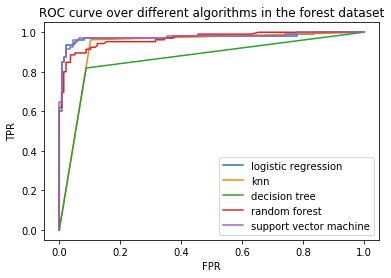

In [38]:
roc_curve(logistic_forest, knn_forest, dt_forest, rf_forest, svm_forest, X5_test, y5_test)
plt.title("ROC curve over different algorithms in the forest dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the forest dataset')

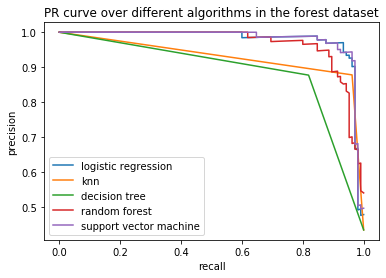

In [39]:
pr_curve(logistic_forest, knn_forest, dt_forest, rf_forest, svm_forest, X5_test, y5_test)
plt.title("PR curve over different algorithms in the forest dataset")

__n small d small: Audit Risk__

__logistic regression__

In [44]:
start_time = process_time()
logistic_audit = LogisticRegression()
logistic_audit.fit(X6_train, y6_train)
end_time = process_time()

logistic_audit_tr_pred = logistic_audit.predict(X6_train)
logistic_audit_te_pred = logistic_audit.predict(X6_test)

In [45]:
timecost_6_logistic = end_time-start_time
timecost_6_logistic

0.015625

In [46]:
accuracy_confusion_tr(y6_train, logistic_audit_tr_pred)

(1.0,
 array([[331,   0],
        [  0, 327]], dtype=int64))

In [47]:
accuracy_confusion_te(y6_test, logistic_audit_te_pred)

(1.0,
 array([[139,   0],
        [  0, 143]], dtype=int64))

__knn__

In [48]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,20,1))
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X6_train, y6_train)
knn_grid_search.best_params_

{'n_neighbors': 2}

In [49]:
start_time = process_time()
knn_audit = KNeighborsClassifier(n_neighbors=2)
knn_audit.fit(X6_train, y6_train)
end_time = process_time()

knn_audit_tr_pred = knn_audit.predict(X6_train)
knn_audit_te_pred = knn_audit.predict(X6_test)

In [50]:
timecost_6_knn = end_time-start_time
timecost_6_knn

0.0

In [51]:
accuracy_confusion_tr(y6_train, knn_audit_tr_pred)

(1.0,
 array([[331,   0],
        [  0, 327]], dtype=int64))

In [52]:
accuracy_confusion_te(y6_test, knn_audit_te_pred)

(1.0,
 array([[139,   0],
        [  0, 143]], dtype=int64))

__decision tree__

In [53]:
start_time = process_time()
dt_audit = DecisionTreeClassifier()
dt_audit.fit(X6_train, y6_train)
end_time = process_time()

dt_audit_tr_pred = dt_audit.predict(X6_train)
dt_audit_te_pred = dt_audit.predict(X6_test)

In [54]:
timecost_6_dt = end_time-start_time
timecost_6_dt

0.0

In [55]:
accuracy_confusion_tr(y6_train, dt_audit_tr_pred)

(1.0,
 array([[331,   0],
        [  0, 327]], dtype=int64))

In [56]:
accuracy_confusion_te(y6_test, dt_audit_te_pred)

(1.0,
 array([[139,   0],
        [  0, 143]], dtype=int64))

__random forest__

In [57]:
start_time = process_time()
rf_audit = RandomForestClassifier(n_estimators = 500)
rf_audit.fit(X6_train, y6_train)
end_time = process_time()

rf_audit_tr_pred = rf_audit.predict(X6_train)
rf_audit_te_pred = rf_audit.predict(X6_test)

In [58]:
timecost_6_rf = end_time-start_time
timecost_6_rf

1.015625

In [59]:
accuracy_confusion_tr(y6_train, rf_audit_tr_pred)

(1.0,
 array([[331,   0],
        [  0, 327]], dtype=int64))

In [60]:
accuracy_confusion_te(y6_test, rf_audit_te_pred)

(1.0,
 array([[139,   0],
        [  0, 143]], dtype=int64))

__svm__

In [95]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-06, 1e-04, 1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 5)
svm_grid_search.fit(X6_train, y6_train)
svm_grid_search.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [61]:
start_time = process_time()
svm_audit = SVC(C = 0.01, gamma = 'scale', kernel = 'linear', probability = True)
svm_audit.fit(X6_train, y6_train)
end_time = process_time()

svm_audit_tr_pred = svm_audit.predict(X6_train)
svm_audit_te_pred = svm_audit.predict(X6_test)

In [62]:
timecost_6_svm = end_time-start_time
timecost_6_svm

0.015625

In [63]:
accuracy_confusion_tr(y6_train, svm_audit_tr_pred)

(1.0,
 array([[331,   0],
        [  0, 327]], dtype=int64))

In [64]:
accuracy_confusion_tr(y6_test, svm_audit_te_pred)

(1.0,
 array([[139,   0],
        [  0, 143]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Audit Risk dataset')

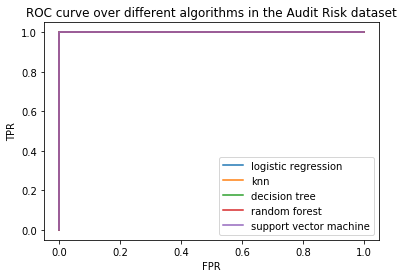

In [65]:
roc_curve(logistic_audit, knn_audit, dt_audit, rf_audit, svm_audit, X6_test, y6_test)
plt.title("ROC curve over different algorithms in the Audit Risk dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Audit Risk dataset')

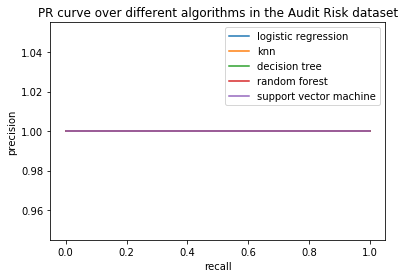

In [66]:
pr_curve(logistic_audit, knn_audit, dt_audit, rf_audit, svm_audit, X6_test, y6_test)
plt.title("PR curve over different algorithms in the Audit Risk dataset")

__n large d small dataset: skin segmentation__

__logistic regression__

In [127]:
start_time = process_time()
logistic_skin = LogisticRegression()
logistic_skin.fit(X1_train, y1_train)
end_time = process_time()

logistic_skin_tr_pred = logistic_skin.predict(X1_train)
logistic_skin_te_pred = logistic_skin.predict(X1_test)

In [128]:
timecost_1_logistic = end_time-start_time
timecost_1_logistic

0.609375

In [129]:
accuracy_confusion_tr(y1_train, logistic_skin_tr_pred)

(0.9190388191606573,
 array([[128316,   7617],
        [  6271,  29335]], dtype=int64))

In [130]:
accuracy_confusion_tr(y1_test, logistic_skin_te_pred)

(0.9185641611578117,
 array([[54943,  3322],
        [ 2665, 12588]], dtype=int64))

__knn__

In [105]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,10,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X1_train, y1_train)
knn_grid_search.best_params_

{'n_neighbors': 4}

In [131]:
start_time = process_time()
knn_skin = KNeighborsClassifier(n_neighbors=4)
knn_skin.fit(X1_train, y1_train)
end_time = process_time()

knn_skin_tr_pred = knn_skin.predict(X1_train)
knn_skin_te_pred = knn_skin.predict(X1_test)

In [132]:
timecost_1_knn = end_time-start_time
timecost_1_knn

0.4375

In [133]:
accuracy_confusion_tr(y1_train, knn_skin_tr_pred)

(0.999650225313194,
 array([[135883,     50],
        [    10,  35596]], dtype=int64))

In [134]:
accuracy_confusion_tr(y1_test, knn_skin_te_pred)

(0.9996055387796186,
 array([[58238,    27],
        [    2, 15251]], dtype=int64))

__decision tree__

In [109]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200, 300],
    'min_samples_split':[2,6,10],
    'min_samples_leaf':[1, 2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 5)
dt_grid_search.fit(X1_train, y1_train)
dt_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [135]:
start_time = process_time()
dt_skin = DecisionTreeClassifier(max_depth = 200, min_samples_split =2 , min_samples_leaf =1)
dt_skin.fit(X1_train, y1_train)
end_time = process_time()

dt_skin_tr_pred = dt_skin.predict(X1_train)
dt_skin_te_pred = dt_skin.predict(X1_test)

In [137]:
timecost_1_dt = end_time-start_time
timecost_1_dt

0.328125

In [138]:
accuracy_confusion_tr(y1_train, dt_skin_tr_pred)

(0.9999475337969791,
 array([[135932,      1],
        [     8,  35598]], dtype=int64))

In [139]:
accuracy_confusion_te(y1_test, dt_skin_te_pred)

(0.9991702712260943,
 array([[58231,    34],
        [   27, 15226]], dtype=int64))

__random forest__

In [113]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[2,6,10],
    'min_samples_leaf':[1, 2, 5]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X1_train, y1_train)
rf_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [144]:
start_time = process_time()
rf_skin = RandomForestClassifier(max_depth = 200, min_samples_split =10 , min_samples_leaf =1)
rf_skin.fit(X1_train, y1_train)
end_time = process_time()

rf_skin_tr_pred = rf_skin.predict(X1_train)
rf_skin_te_pred = rf_skin.predict(X1_test)

In [145]:
timecost_1_rf = end_time-start_time
timecost_1_rf

9.859375

In [146]:
accuracy_confusion_tr(y1_train, rf_skin_tr_pred)

(0.9998017943441433,
 array([[135902,     31],
        [     3,  35603]], dtype=int64))

In [147]:
accuracy_confusion_te(y1_test, rf_skin_te_pred)

(0.9995783345575233,
 array([[58236,    29],
        [    2, 15251]], dtype=int64))

__svm__

In [118]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf'],
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X1_train, y1_train)
svm_grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [148]:
start_time = process_time()
svm_skin = SVC(C = 1, kernel = 'rbf',probability = True)
svm_skin.fit(X1_train, y1_train)
end_time = process_time()

svm_skin_tr_pred = svm_skin.predict(X1_train)
svm_skin_te_pred = svm_skin.predict(X1_test)

In [149]:
timecost_1_svm = end_time-start_time
timecost_1_svm

155.5

In [150]:
accuracy_confusion_tr(y1_train, svm_skin_tr_pred)

(0.9982627857221973,
 array([[135641,    292],
        [     6,  35600]], dtype=int64))

In [151]:
accuracy_confusion_tr(y1_test, svm_skin_te_pred)

(0.9983405424521886,
 array([[58143,   122],
        [    0, 15253]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Skin Segement dataset')

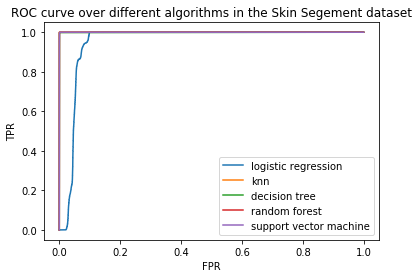

In [152]:
roc_curve(logistic_skin, knn_skin, dt_skin, rf_skin, svm_skin, X1_test, y1_test)
plt.title("ROC curve over different algorithms in the Skin Segement dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Skin Segement dataset')

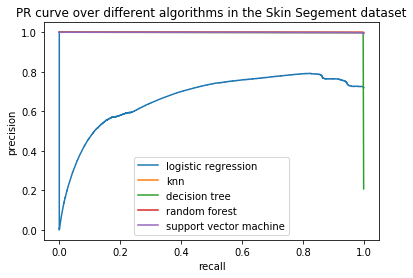

In [153]:
pr_curve(logistic_skin, knn_skin, dt_skin, rf_skin, svm_skin, X1_test, y1_test)
plt.title("PR curve over different algorithms in the Skin Segement dataset")

__n large d small: Pulstar__

__logistic regression__

In [154]:
start_time = process_time()
logistic_pulstar = LogisticRegression()
logistic_pulstar.fit(X2_train, y2_train)
end_time = process_time()

logistic_pulstar_tr_pred = logistic_pulstar.predict(X2_train)
logistic_pulstar_te_pred = logistic_pulstar.predict(X2_test)

In [155]:
timecost_2_logistic = end_time-start_time
timecost_2_logistic

0.265625

In [156]:
accuracy_confusion_tr(y2_train, logistic_pulstar_tr_pred)

(0.9416132150074686,
 array([[11085,   272],
        [ 1057, 10348]], dtype=int64))

In [157]:
accuracy_confusion_tr(y2_test, logistic_pulstar_te_pred)

(0.9420869208692086,
 array([[4766,  136],
        [ 429, 4425]], dtype=int64))

__knn__

In [127]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,5,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X2_train, y2_train)
knn_grid_search.best_params_

{'n_neighbors': 2}

In [158]:
start_time = process_time()
knn_pulstar = KNeighborsClassifier(n_neighbors=2)
knn_pulstar.fit(X2_train, y2_train)
end_time = process_time()

knn_pulstar_tr_pred = knn_pulstar.predict(X2_train)
knn_pulstar_te_pred = knn_pulstar.predict(X2_test)

In [159]:
timecost_2_knn = end_time-start_time
timecost_2_knn

0.078125

In [160]:
accuracy_confusion_tr(y2_train, knn_pulstar_tr_pred)

(0.9929268078376241,
 array([[11357,     0],
        [  161, 11244]], dtype=int64))

In [161]:
accuracy_confusion_tr(y2_test, knn_pulstar_te_pred)

(0.9724272242722427,
 array([[4770,  132],
        [ 137, 4717]], dtype=int64))

__decision tree__

In [131]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200, 300],
    'min_samples_split':[2,5, 6, 7, 10],
    'min_samples_leaf':[1, 2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 5)
dt_grid_search.fit(X2_train, y2_train)
dt_grid_search.best_params_

{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [162]:
start_time = process_time()
dt_pulstar = DecisionTreeClassifier(max_depth = 100, min_samples_split =6 , min_samples_leaf =1)
dt_pulstar.fit(X2_train, y2_train)
end_time = process_time()

dt_pulstar_tr_pred = dt_pulstar.predict(X2_train)
dt_pulstar_te_pred = dt_pulstar.predict(X2_test)

In [163]:
timecost_2_dt = end_time-start_time
timecost_2_dt

0.359375

In [164]:
accuracy_confusion_tr(y2_train, dt_pulstar_tr_pred)

(0.9955188472014761,
 array([[11321,    36],
        [   66, 11339]], dtype=int64))

In [165]:
accuracy_confusion_te(y2_test, dt_pulstar_te_pred)

(0.9528495284952849,
 array([[4660,  242],
        [ 218, 4636]], dtype=int64))

__random forest__

In [139]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[2,6],
    'min_samples_leaf':[1, 2]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X2_train, y2_train)
rf_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [166]:
start_time = process_time()
rf_pulstar = RandomForestClassifier(max_depth = 200, min_samples_split =2 , min_samples_leaf =1)
rf_pulstar.fit(X2_train, y2_train)
end_time = process_time()

rf_pulstar_tr_pred = rf_pulstar.predict(X2_train)
rf_pulstar_te_pred = rf_pulstar.predict(X2_test)

In [167]:
timecost_2_rf = end_time-start_time
timecost_2_rf

4.484375

In [168]:
accuracy_confusion_tr(y2_train, rf_pulstar_tr_pred)

(1.0,
 array([[11357,     0],
        [    0, 11405]], dtype=int64))

In [169]:
accuracy_confusion_te(y2_test, rf_pulstar_te_pred)

(0.975809758097581,
 array([[4811,   91],
        [ 145, 4709]], dtype=int64))

__svm__

In [143]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X2_train, y2_train)
svm_grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [170]:
start_time = process_time()
svm_pulstar = SVC(C = 1, kernel = 'rbf',probability = True)
svm_pulstar.fit(X2_train, y2_train)
end_time = process_time()

svm_pulstar_tr_pred = svm_pulstar.predict(X2_train)
svm_pulstar_te_pred = svm_pulstar.predict(X2_test)

In [171]:
timecost_2_svm = end_time-start_time
timecost_2_svm

22.640625

In [172]:
accuracy_confusion_tr(y2_train, svm_pulstar_tr_pred)

(0.9474123539232053,
 array([[11155,   202],
        [  995, 10410]], dtype=int64))

In [173]:
accuracy_confusion_tr(y2_test, svm_pulstar_te_pred)

(0.9470069700697007,
 array([[4800,  102],
        [ 415, 4439]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Pulstar dataset')

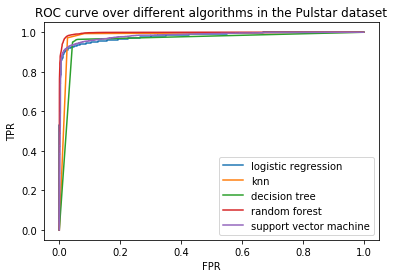

In [174]:
roc_curve(logistic_pulstar, knn_pulstar, dt_pulstar, rf_pulstar, svm_pulstar, X2_test, y2_test)
plt.title("ROC curve over different algorithms in the Pulstar dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Pulstar dataset')

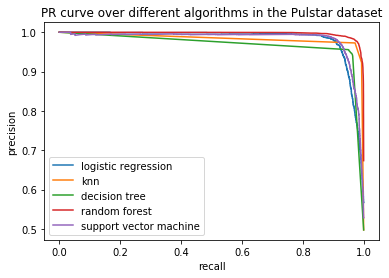

In [175]:
pr_curve(logistic_pulstar, knn_pulstar, dt_pulstar, rf_pulstar, svm_pulstar, X2_test, y2_test)
plt.title("PR curve over different algorithms in the Pulstar dataset")

__n small d large dataset: Arcene__

__logistic regression__

In [176]:
start_time = process_time()
logistic_arcene = LogisticRegression()
logistic_arcene.fit(X4_train, y4_train)
end_time = process_time()

logistic_arcene_tr_pred = logistic_arcene.predict(X4_train)
logistic_arcene_te_pred = logistic_arcene.predict(X4_test)

In [177]:
timecost_4_logistic = end_time-start_time
timecost_4_logistic

0.84375

In [178]:
accuracy_confusion_tr(y4_train, logistic_arcene_tr_pred)

(1.0,
 array([[56,  0],
        [ 0, 44]], dtype=int64))

In [179]:
accuracy_confusion_tr(y4_test, logistic_arcene_te_pred)

(0.82,
 array([[46, 10],
        [ 8, 36]], dtype=int64))

__knn__

In [152]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,10,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X4_train, y4_train)
knn_grid_search.best_params_

{'n_neighbors': 5}

In [180]:
start_time = process_time()
knn_arcene = KNeighborsClassifier(n_neighbors=5)
knn_arcene.fit(X4_train, y4_train)
end_time = process_time()

knn_arcene_tr_pred = knn_arcene.predict(X4_train)
knn_arcene_te_pred = knn_arcene.predict(X4_test)

In [181]:
timecost_4_knn = end_time-start_time
timecost_4_knn

0.078125

In [182]:
accuracy_confusion_tr(y4_train, knn_arcene_tr_pred)

(0.87,
 array([[47,  9],
        [ 4, 40]], dtype=int64))

In [183]:
accuracy_confusion_tr(y4_test, knn_arcene_te_pred)

(0.8,
 array([[44, 12],
        [ 8, 36]], dtype=int64))

__decision tree__

In [156]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200, 300],
    'min_samples_split':[2,5, 6, 7, 10],
    'min_samples_leaf':[1, 2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 5)
dt_grid_search.fit(X4_train, y4_train)
dt_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [184]:
start_time = process_time()
dt_arcene = DecisionTreeClassifier(max_depth = 200, min_samples_split =2 , min_samples_leaf =1)
dt_arcene.fit(X4_train, y4_train)
end_time = process_time()

dt_arcene_tr_pred = dt_arcene.predict(X4_train)
dt_arcene_te_pred = dt_arcene.predict(X4_test)

In [186]:
timecost_4_dt = end_time-start_time
timecost_4_dt

0.203125

In [187]:
accuracy_confusion_tr(y4_train, dt_arcene_tr_pred)

(1.0,
 array([[56,  0],
        [ 0, 44]], dtype=int64))

In [188]:
accuracy_confusion_te(y4_test, dt_arcene_te_pred)

(0.64,
 array([[41, 15],
        [21, 23]], dtype=int64))

__random forest__

In [161]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200, 500],
    'min_samples_split':[2,6],
    'min_samples_leaf':[1, 2]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X4_train, y4_train)
rf_grid_search.best_params_

{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [189]:
start_time = process_time()
rf_arcene = RandomForestClassifier(n_estimators = 500, max_depth = 100, min_samples_split =2 , min_samples_leaf =1)
rf_arcene.fit(X4_train, y4_train)
end_time = process_time()

rf_arcene_tr_pred = rf_arcene.predict(X4_train)
rf_arcene_te_pred = rf_arcene.predict(X4_test)

In [190]:
timecost_4_rf = end_time-start_time
timecost_4_rf

1.484375

In [191]:
accuracy_confusion_tr(y4_train, rf_arcene_tr_pred)

(1.0,
 array([[56,  0],
        [ 0, 44]], dtype=int64))

In [192]:
accuracy_confusion_te(y4_test, rf_arcene_te_pred)

(0.78,
 array([[48,  8],
        [14, 30]], dtype=int64))

__svm__

In [165]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf'],
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X4_train, y4_train)
svm_grid_search.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [193]:
start_time = process_time()
svm_arcene = SVC(C=0.01, kernel = 'linear', probability = True)
svm_arcene.fit(X4_train, y4_train)
end_time = process_time()

svm_arcene_tr_pred = svm_arcene.predict(X4_train)
svm_arcene_te_pred = svm_arcene.predict(X4_test)

In [194]:
timecost_4_svm = end_time-start_time
timecost_4_svm

0.796875

In [195]:
accuracy_confusion_tr(y4_train, svm_arcene_tr_pred)

(1.0,
 array([[56,  0],
        [ 0, 44]], dtype=int64))

In [196]:
accuracy_confusion_tr(y4_test, svm_arcene_te_pred)

(0.83,
 array([[46, 10],
        [ 7, 37]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Pulstar dataset')

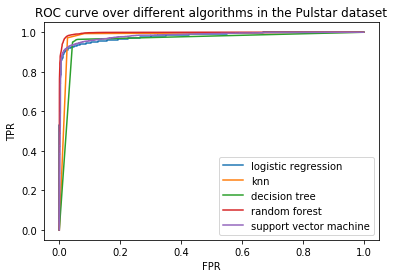

In [197]:
roc_curve(logistic_pulstar, knn_pulstar, dt_pulstar, rf_pulstar, svm_pulstar, X2_test, y2_test)
plt.title("ROC curve over different algorithms in the Pulstar dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Pulstar dataset')

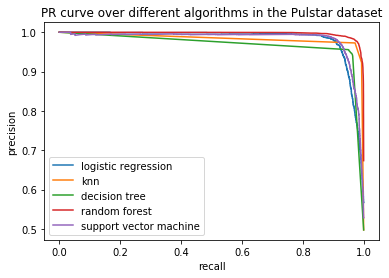

In [198]:
pr_curve(logistic_pulstar, knn_pulstar, dt_pulstar, rf_pulstar, svm_pulstar, X2_test, y2_test)
plt.title("PR curve over different algorithms in the Pulstar dataset")

__n small d large dataset: tumor__

__logistic regression__

In [199]:
start_time = process_time()
logistic_tumor = LogisticRegression()
logistic_tumor.fit(X3_train, y3_train)
end_time = process_time()

logistic_tumor_tr_pred = logistic_tumor.predict(X3_train)
logistic_tumor_te_pred = logistic_tumor.predict(X3_test)

In [200]:
timecost_3_logistic = end_time-start_time
timecost_3_logistic

0.546875

In [201]:
accuracy_confusion_tr(y3_train, logistic_tumor_tr_pred)

(1.0,
 array([[ 98,   0],
        [  0, 102]], dtype=int64))

In [202]:
accuracy_confusion_tr(y3_test, logistic_tumor_te_pred)

(1.0,
 array([[48,  0],
        [ 0, 39]], dtype=int64))

__knn__

In [174]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,10,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 5)
knn_grid_search.fit(X3_train, y3_train)
knn_grid_search.best_params_

{'n_neighbors': 1}

In [203]:
start_time = process_time()
knn_tumor = KNeighborsClassifier(n_neighbors=1)
knn_tumor.fit(X3_train, y3_train)
end_time = process_time()

knn_tumor_tr_pred = knn_tumor.predict(X3_train)
knn_tumor_te_pred = knn_tumor.predict(X3_test)

In [204]:
timecost_3_knn = end_time-start_time
timecost_3_knn

0.390625

In [205]:
accuracy_confusion_tr(y3_train, knn_tumor_tr_pred)

(1.0,
 array([[ 98,   0],
        [  0, 102]], dtype=int64))

In [206]:
accuracy_confusion_tr(y3_test, knn_tumor_te_pred)

(1.0,
 array([[48,  0],
        [ 0, 39]], dtype=int64))

__decision tree__

In [178]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200, 300],
    'min_samples_split':[2,5, 10],
    'min_samples_leaf':[1, 2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 5)
dt_grid_search.fit(X3_train, y3_train)
dt_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [207]:
start_time = process_time()
dt_tumor = DecisionTreeClassifier(max_depth = 200, min_samples_split =5 , min_samples_leaf =5)
dt_tumor.fit(X3_train, y3_train)
end_time = process_time()

dt_tumor_tr_pred = dt_tumor.predict(X3_train)
dt_tumor_te_pred = dt_tumor.predict(X3_test)

In [208]:
timecost_3_dt = end_time-start_time
timecost_3_dt

0.421875

In [209]:
accuracy_confusion_tr(y3_train, dt_tumor_tr_pred)

(1.0,
 array([[ 98,   0],
        [  0, 102]], dtype=int64))

In [210]:
accuracy_confusion_te(y3_test, dt_tumor_te_pred)

(0.9885057471264368,
 array([[48,  0],
        [ 1, 38]], dtype=int64))

__random forest__

In [182]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1, 2, 5]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X4_train, y4_train)
rf_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [211]:
start_time = process_time()
rf_tumor = RandomForestClassifier(n_estimators = 500, max_depth = 200, min_samples_split =5 , min_samples_leaf =2)
rf_tumor.fit(X3_train, y3_train)
end_time = process_time()

rf_tumor_tr_pred = rf_tumor.predict(X3_train)
rf_tumor_te_pred = rf_tumor.predict(X3_test)

In [213]:
timecost_3_rf = end_time-start_time
timecost_3_rf

2.1875

In [214]:
accuracy_confusion_tr(y3_train, rf_tumor_tr_pred)

(1.0,
 array([[ 98,   0],
        [  0, 102]], dtype=int64))

In [215]:
accuracy_confusion_te(y3_test, rf_tumor_te_pred)

(1.0,
 array([[48,  0],
        [ 0, 39]], dtype=int64))

__svm__

In [186]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X4_train, y4_train)
svm_grid_search.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [216]:
start_time = process_time()
svm_tumor = SVC(C=0.01, kernel = 'linear', probability = True)
svm_tumor.fit(X3_train, y3_train)
end_time = process_time()

svm_tumor_tr_pred = svm_tumor.predict(X3_train)
svm_tumor_te_pred = svm_tumor.predict(X3_test)

In [218]:
timecost_3_svm = end_time-start_time
timecost_3_svm

1.859375

In [219]:
accuracy_confusion_tr(y3_train, svm_tumor_tr_pred)

(1.0,
 array([[ 98,   0],
        [  0, 102]], dtype=int64))

In [220]:
accuracy_confusion_tr(y3_test, svm_tumor_te_pred)

(1.0,
 array([[48,  0],
        [ 0, 39]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Tumor dataset')

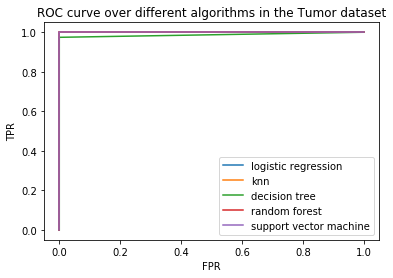

In [221]:
roc_curve(logistic_tumor, knn_tumor, dt_tumor, rf_tumor, svm_tumor, X3_test, y3_test)
plt.title("ROC curve over different algorithms in the Tumor dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Tumor dataset')

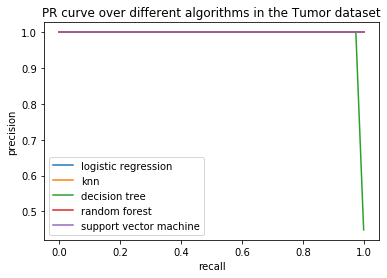

In [222]:
pr_curve(logistic_tumor, knn_tumor, dt_tumor, rf_tumor, svm_tumor, X3_test, y3_test)
plt.title("PR curve over different algorithms in the Tumor dataset")

__n large d large dataset: Gisette__

__logistic regression__

In [223]:
start_time = process_time()
logistic_gisette = LogisticRegression()
logistic_gisette.fit(X7_train, y7_train)
end_time = process_time()

logistic_gisette_tr_pred = logistic_gisette.predict(X7_train)
logistic_gisette_te_pred = logistic_gisette.predict(X7_test)

In [224]:
timecost_7_logistic = end_time-start_time
timecost_7_logistic

7.015625

In [225]:
accuracy_confusion_tr(y7_train, logistic_gisette_tr_pred)

(1.0,
 array([[3000,    0],
        [   0, 3000]], dtype=int64))

In [226]:
accuracy_confusion_tr(y7_test, logistic_gisette_te_pred)

(0.981,
 array([[491,   9],
        [ 10, 490]], dtype=int64))

__knn__

In [195]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' : list(range(1,5,1)),
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 3)
knn_grid_search.fit(X7_train, y7_train)
knn_grid_search.best_params_

{'n_neighbors': 3}

In [227]:
start_time = process_time()
knn_gisette = KNeighborsClassifier(n_neighbors=3)
knn_gisette.fit(X7_train, y7_train)
end_time = process_time()

knn_gisette_tr_pred = knn_gisette.predict(X7_train)
knn_gisette_te_pred = knn_gisette.predict(X7_test)

In [228]:
timecost_7_knn = end_time-start_time
timecost_7_knn

9.171875

In [229]:
accuracy_confusion_tr(y7_train, knn_gisette_tr_pred)

(0.9776666666666667,
 array([[2941,   59],
        [  75, 2925]], dtype=int64))

In [230]:
accuracy_confusion_tr(y7_test, knn_gisette_te_pred)

(0.949,
 array([[480,  20],
        [ 31, 469]], dtype=int64))

__decision tree__

In [199]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200, 300],
    'min_samples_split':[2,5, 10],
    'min_samples_leaf':[1, 2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 3)
dt_grid_search.fit(X7_train, y7_train)
dt_grid_search.best_params_

{'max_depth': 200, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [233]:
start_time = process_time()
dt_gisette = DecisionTreeClassifier(max_depth = 200, min_samples_split =5 , min_samples_leaf =10)
dt_gisette.fit(X7_train, y7_train)
end_time = process_time()

dt_gisette_tr_pred = dt_gisette.predict(X7_train)
dt_gisette_te_pred = dt_gisette.predict(X7_test)

In [234]:
timecost_7_dt = end_time-start_time
timecost_7_dt

12.4375

In [235]:
accuracy_confusion_tr(y7_train, dt_gisette_tr_pred)

(0.9668333333333333,
 array([[2915,   85],
        [ 114, 2886]], dtype=int64))

In [236]:
accuracy_confusion_te(y7_test, dt_gisette_te_pred)

(0.93,
 array([[472,  28],
        [ 42, 458]], dtype=int64))

__random forest__

In [203]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[5,10],
    'min_samples_leaf':[2, 5]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X7_train, y7_train)
rf_grid_search.best_params_

{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [237]:
start_time = process_time()
rf_gisette = RandomForestClassifier(max_depth = 100, min_samples_split =5 , min_samples_leaf =2)
rf_gisette.fit(X7_train, y7_train)
end_time = process_time()

rf_gisette_tr_pred = rf_gisette.predict(X7_train)
rf_gisette_te_pred = rf_gisette.predict(X7_test)

In [238]:
timecost_7_rf = end_time-start_time
timecost_7_rf

11.875

In [239]:
accuracy_confusion_tr(y7_train, rf_gisette_tr_pred)

(0.998,
 array([[2994,    6],
        [   6, 2994]], dtype=int64))

In [240]:
accuracy_confusion_te(y7_test, rf_gisette_te_pred)

(0.97,
 array([[489,  11],
        [ 19, 481]], dtype=int64))

__svm__

In [207]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear','sigmoid', 'rbf']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X7_train, y7_train)
svm_grid_search.best_params_

{'C': 1, 'kernel': 'sigmoid'}

In [241]:
start_time = process_time()
svm_gisette = SVC(C= 1, kernel = 'sigmoid', probability = True)
svm_gisette.fit(X7_train, y7_train)
end_time = process_time()

svm_gisette_tr_pred = svm_gisette.predict(X7_train)
svm_gisette_te_pred = svm_gisette.predict(X7_test)

In [242]:
timecost_7_svm = end_time-start_time
timecost_7_svm

344.390625

In [243]:
accuracy_confusion_tr(y7_train, svm_gisette_tr_pred)

(0.9865,
 array([[2964,   36],
        [  45, 2955]], dtype=int64))

In [244]:
accuracy_confusion_tr(y7_test, svm_gisette_te_pred)

(0.978,
 array([[488,  12],
        [ 10, 490]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Gisette dataset')

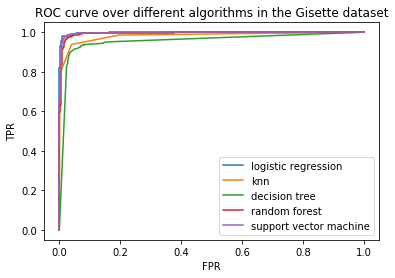

In [245]:
roc_curve(logistic_gisette, knn_gisette, dt_gisette, rf_gisette, svm_gisette, X7_test, y7_test)
plt.title("ROC curve over different algorithms in the Gisette dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Gisette dataset')

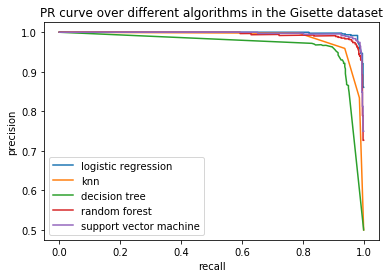

In [246]:
pr_curve(logistic_gisette, knn_gisette, dt_gisette, rf_gisette, svm_gisette, X7_test, y7_test)
plt.title("PR curve over different algorithms in the Gisette dataset")

__n large d large dataset: Protein__

__logistic regression__

In [247]:
start_time = process_time()
logistic_protein = LogisticRegression()
logistic_protein.fit(X8_train, y8_train)
end_time = process_time()

logistic_protein_tr_pred = logistic_protein.predict(X8_train)
logistic_protein_te_pred = logistic_protein.predict(X8_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [248]:
timecost_8_logistic = end_time-start_time
timecost_8_logistic

34.25

In [249]:
accuracy_confusion_tr(y8_train, logistic_protein_tr_pred)

(1.0,
 array([[11495,     0],
        [    0, 11533]], dtype=int64))

In [250]:
accuracy_confusion_tr(y8_test, logistic_protein_te_pred)

(0.9961499493414387,
 array([[4916,   38],
        [   0, 4916]], dtype=int64))

__knn__

In [16]:
# tune the parameters
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors' :[1, 5, 10, 50, 100]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv = 3)
knn_grid_search.fit(X8_train, y8_train)
knn_grid_search.best_params_

{'n_neighbors': 1}

In [251]:
start_time = process_time()
knn_protein = KNeighborsClassifier(n_neighbors=1)
knn_protein.fit(X8_train, y8_train)
end_time = process_time()

knn_protein_tr_pred = knn_protein.predict(X8_train)
knn_protein_te_pred = knn_protein.predict(X8_test)

In [252]:
timecost_8_knn = end_time-start_time
timecost_8_knn

56.65625

In [253]:
accuracy_confusion_tr(y8_train, knn_protein_tr_pred)

(1.0,
 array([[11495,     0],
        [    0, 11533]], dtype=int64))

In [254]:
accuracy_confusion_tr(y8_test, knn_protein_te_pred)

(0.9954407294832827,
 array([[4909,   45],
        [   0, 4916]], dtype=int64))

__decision tree__

In [20]:
# tune the parameters
dt = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[2,5],
    'min_samples_leaf':[2, 5]
}

dt_grid_search = GridSearchCV(dt, dt_param_grid, cv = 3)
dt_grid_search.fit(X8_train, y8_train)
dt_grid_search.best_params_

{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [255]:
start_time = process_time()
dt_protein = DecisionTreeClassifier(max_depth = 100, min_samples_split =5 , min_samples_leaf =2)
dt_protein.fit(X8_train, y8_train)
end_time = process_time()

dt_protein_tr_pred = dt_protein.predict(X8_train)
dt_protein_te_pred = dt_protein.predict(X8_test)

In [256]:
timecost_8_dt = end_time-start_time
timecost_8_dt

233.96875

In [257]:
accuracy_confusion_tr(y8_train, dt_protein_tr_pred)

(0.9994354698627758,
 array([[11494,     1],
        [   12, 11521]], dtype=int64))

In [258]:
accuracy_confusion_te(y8_test, dt_protein_te_pred)

(0.992806484295846,
 array([[4900,   54],
        [  17, 4899]], dtype=int64))

__random forest__

In [24]:
# tune the parameters
rf = RandomForestClassifier()
rf_param_grid = {
    'max_depth' : [100, 200],
    'min_samples_split':[2,5],
    'min_samples_leaf':[2, 5]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv = 3)
rf_grid_search.fit(X8_train, y8_train)
rf_grid_search.best_params_

{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [259]:
start_time = process_time()
rf_protein = RandomForestClassifier(n_estimators = 500, max_depth = 100, min_samples_split =2 , min_samples_leaf =2)
rf_protein.fit(X8_train, y8_train)
end_time = process_time()

rf_protein_tr_pred = rf_protein.predict(X8_train)
rf_protein_te_pred = rf_protein.predict(X8_test)

In [260]:
timecost_8_rf = end_time-start_time
timecost_8_rf

1134.671875

In [261]:
accuracy_confusion_tr(y8_train, rf_protein_tr_pred)

(0.9996525968386313,
 array([[11487,     8],
        [    0, 11533]], dtype=int64))

In [262]:
accuracy_confusion_te(y8_test, rf_protein_te_pred)

(0.9982776089159068,
 array([[4937,   17],
        [   0, 4916]], dtype=int64))

__svm__

In [29]:
# tune the parameters
svm = SVC()
svm_param_grid = {
    'C' : [1e-02,0.1, 1],
    'kernel': ['linear', 'sigmoid', 'rbf']
}

svm_grid_search = GridSearchCV(svm, svm_param_grid, cv = 3)
svm_grid_search.fit(X8_train, y8_train)
svm_grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [263]:
start_time = process_time()
svm_protein = SVC(C = 1, kernel = 'rbf', probability = True)
svm_protein.fit(X8_train, y8_train)
end_time = process_time()

svm_protein_tr_pred = svm_protein.predict(X8_train)
svm_protein_te_pred = svm_protein.predict(X8_test)

In [264]:
timecost_8_svm = end_time-start_time
timecost_8_svm

1750.21875

In [265]:
accuracy_confusion_tr(y8_train, svm_protein_tr_pred)

(0.9987840889352093,
 array([[11467,    28],
        [    0, 11533]], dtype=int64))

In [266]:
accuracy_confusion_tr(y8_test, svm_protein_te_pred)

(0.9973657548125633,
 array([[4928,   26],
        [   0, 4916]], dtype=int64))

Text(0.5, 1.0, 'ROC curve over different algorithms in the Protein dataset')

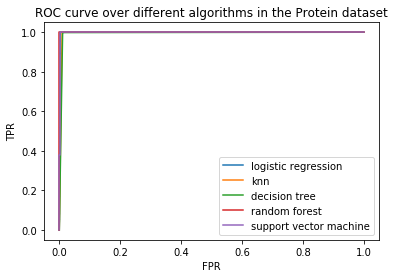

In [267]:
roc_curve(logistic_protein, knn_protein, dt_protein, rf_protein, svm_protein, X8_test, y8_test)
plt.title("ROC curve over different algorithms in the Protein dataset")

Text(0.5, 1.0, 'PR curve over different algorithms in the Protein dataset')

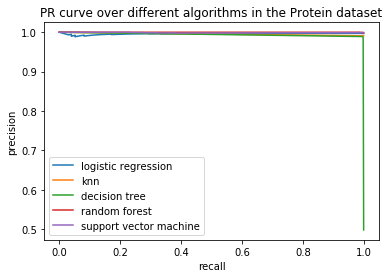

In [268]:
pr_curve(logistic_protein, knn_protein, dt_protein, rf_protein, svm_protein, X8_test, y8_test)
plt.title("PR curve over different algorithms in the Protein dataset")